---
#Notebook #1:Entrenamiento del clasificador Modelo/Sin modelo
---

Este notebook forma parte del trabajo de fin de grado realizado por:

*  Daniel Arnaiz Gutierrez 

Con la colaboración de los tutores:

*  José Franciso Díez Pastor
*  Cesar Ignacio Garcıa Osorio

El resto de este proyecto se puede encontrar en el siguiente repositorio de GitHub: [TFG-Amazon-Scraper](https://github.com/daniarnaizg/TFG-Amazon-Scraper)

En la parte izquierda de esta ventana se encuentra la tabla de contenido de este notebook.

En este noteook se recoge el proceso del entrenamiento de un clasificador de imágnes con ayuda de la librería de inteligencia Artificial [Keras](https://keras.io/).


---
# Importación del conjunto de datos de entrenamiento

Lo primero en el proceso de entrenamiento del clasificador de imágenes será importar el dataset que contiene las imágenes previamente anotadas de forma manual. Estas imágenes han sido etiquetadas con la herramienta [Dataturks](https://dataturks.com/).

El archivo ZIP que contiene las imágenes se encuentra en el repositorio del proyecto, en el directorio 'datasets'.

A continuación los descargamos y lo descomprimimos. Al descomprimirlo veremos que existen dos carpetas llamas '0' y '1',  cada una recoge las imágenes de una clase:

*  En la carpeta llamada *'0'* se encuentran las imágenes en las que SI hay modelo.
*  En la carpeta llamada *'1* se encuentran las imágenes en las que NO hay modelo.



In [1]:
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/datasets/dataset-modelo.zip

--2019-07-02 18:56:28--  https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/datasets/dataset-modelo.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/daniarnaizg/TFG-Amazon-Scraper/master/datasets/dataset-modelo.zip [following]
--2019-07-02 18:56:28--  https://media.githubusercontent.com/media/daniarnaizg/TFG-Amazon-Scraper/master/datasets/dataset-modelo.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255245328 (243M) [application/zip]
Saving to: ‘dataset-modelo.zip’

dataset-modelo.zip  100%[===================>] 243.42M   185MB/s    in 1.3s    

2019-07-02 18:56:

In [0]:
from IPython.display import clear_output

!unzip -a dataset-modelo.zip
clear_output()

In [3]:
!ls dataset-modelo

0  1


---
# Configuración del entrenador

En las siguientes celdas se puede ver la configuración del entrenador y la extracción de la información y la etiqueta de cada imagen.

In [4]:
import numpy as np
import glob
import cv2
import os

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
'''Config of the model'''

EPOCHS = 10     # Number of training epochs
INIT_LR = 1e-3  # Initial Learning rate
BS = 32         # Batch size

data = []
labels = []

In [0]:
'''
Extraction of the data and label of every image.
'''
for folder in os.listdir('dataset-modelo/'):
  dir = 'dataset-modelo/' + folder + '/*.jpg'
  class_dir = glob.glob(dir)
  for imagePath in class_dir:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(folder) # The label is the  folder each image is in

In [0]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

A continuación se crean los subconjuntos necesarios para aplicar la técnica de validación cruzada. Esta técnica consiste en la división del datasets en dos partes, una para el entrenamiento y la otra para comprobar los resultados.

En este caso se ha utilizado un ratio de 75/25, siendo el 75% utilizado para el entrenamiento, y el 25% restante para el test.

In [0]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [0]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

---
# Entrenamiento

La siguiente celda recoge las capas del modelo que sigue el clasificador.

A continuación se inicia el proceso de entrenamiento y se guarda el resultado para poder ser utilizado más adelante.


Una vez terminado el proceso, podemos ver la precisión con la que finalmente ha sido entrenado el clasificador. En este caso obtenemos una precisión cercana al 94%.

In [0]:
'''Initialization of the model'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
clear_output()

In [11]:
'''Train the network'''
model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)
model.save("clasificador-modelos.h5")

score = model.evaluate(testX, testY, verbose=1)


print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Train on 1410 samples, validate on 470 samples
Epoch 1/10
1410/1410 [==============================] - 4s 3ms/step - loss: 0.4832 - acc: 0.7752 - val_loss: 0.3181 - val_acc: 0.8681
Epoch 2/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.2775 - acc: 0.8879 - val_loss: 0.3289 - val_acc: 0.8596
Epoch 3/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.1900 - acc: 0.9291 - val_loss: 0.2102 - val_acc: 0.9426
Epoch 4/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.1939 - acc: 0.9220 - val_loss: 0.2042 - val_acc: 0.9340
Epoch 5/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.1287 - acc: 0.9525 - val_loss: 0.2047 - val_acc: 0.9319
Epoch 6/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.0972 - acc: 0.9688 - val_loss: 0.1930 - val_acc: 0.9362
Epoch 7/10
1410/1410 [==============================] - 3s 2ms/step - loss: 0.0913 - acc: 0.9716 - val_loss: 0.1923 - val_acc: 0.9340
Epoch 8/10
1410

In [0]:
from google.colab import files
files.download('clasificador-modelos.h5')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total para

---
# Test del clasificador

A continuación se pondrá a prueba el clasificador con imágenes del propio dataset. Aunque se podría probar con otras imágenes sin ningún problema.

Predicción:  Modelo


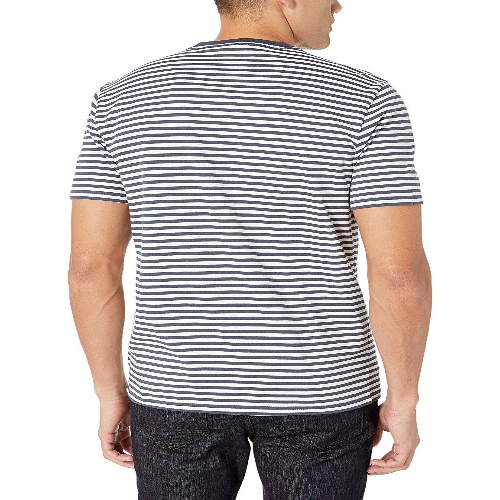

In [14]:
import cv2
from google.colab.patches import cv2_imshow

# load the image
image = cv2.imread("dataset-modelo/0/Modelo_1003.jpg")
original = image.copy()

# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)[0]
prediction = int(predictions.argmax())

final_prediction = ''
if prediction is 0:
    final_prediction = "Modelo"
else:
    final_prediction = "Sin modelo"

print("Predicción: ", final_prediction)
peq = cv2.resize(original, (500, 500))
cv2_imshow(peq)

In [0]:
# Descomentar para ver el contenido de los directorios si desea cambiar la imagen a comprobar.
# !ls dataset-modelo/0